# Task 1 : Iris flower classification


# Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

#importing matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#ignore warnings
import warnings
sns.set()
def warn(*args,**kwargs):
    pass
warnings.warn=warn

# Data exploration


# loading data

In [12]:
address='F:/python course/oasis/OIBSIP/task 1/iris.csv'
df_iris=pd.read_csv(address)
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# remove iris- from species column

In [14]:
df=df_iris.copy()
df['Species']=df.Species.str.replace('Iris-','')
df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
#count species
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

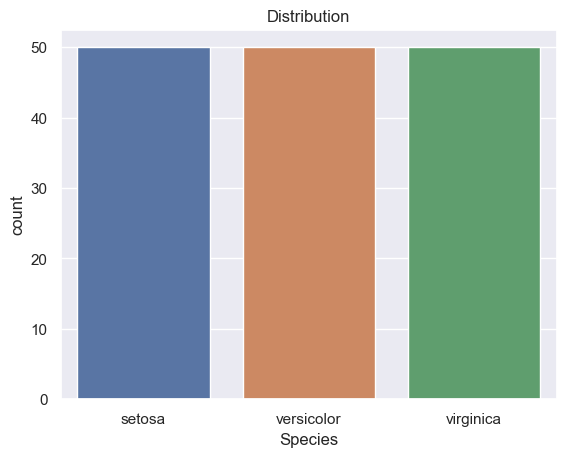

In [17]:
#view distribution of species
sns.countplot(x='Species',data=df)
plt.title("Distribution")
plt.show()

In [18]:
#summary of dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Visualization


In [22]:
#extract from the dataframe features
df_iris=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
df_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

[Text(0.5, 0, 'Sepal Length'),
 Text(0, 0.5, 'Sepal Width'),
 Text(0.5, 1.0, "Sepal's Length against Width")]

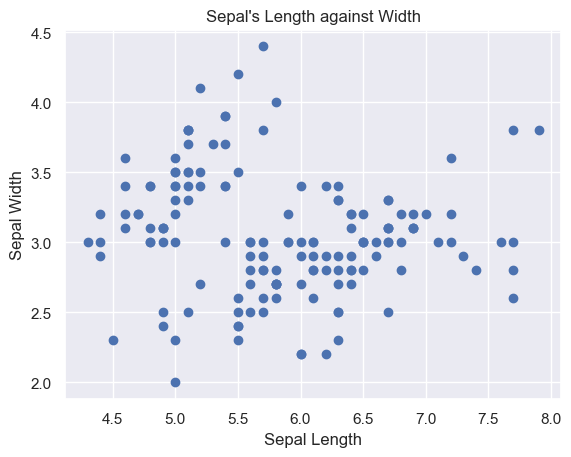

In [24]:
#scatter plot for sepal length against width
ax=plt.axes()
ax.scatter(df.SepalLengthCm,df.SepalWidthCm)
ax.set(xlabel='Sepal Length',
      ylabel='Sepal Width',
      title="Sepal's Length against Width")

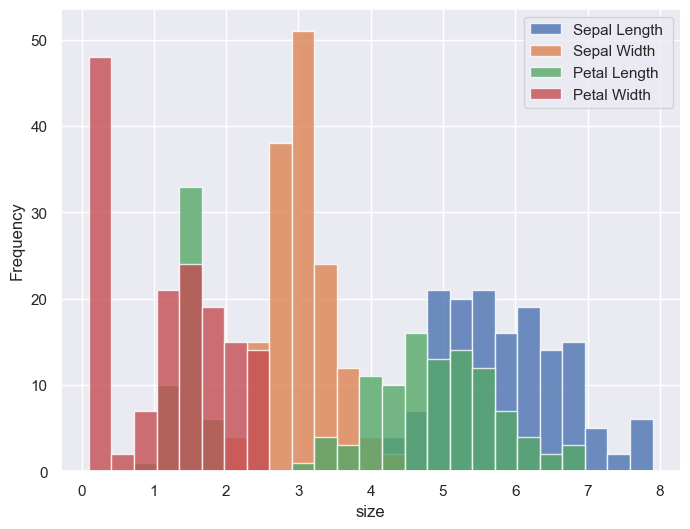

In [32]:
#plot distribution of the extracted features
sns.set_context('notebook')
ax=df.plot.hist(bins=25,alpha=0.8,figsize=(8,6))
ax.set_xlabel('size')
plt.legend(('Sepal Length ','Sepal Width ','Petal Length ','Petal Width '))

In [37]:
#kmeans model, assumption where there is three species
k_m=KMeans(3)
k_m.fit(df_iris)
#new dataframe with predicted clusters
k_m_new=k_m.fit_predict(df_iris)
k_m_new


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

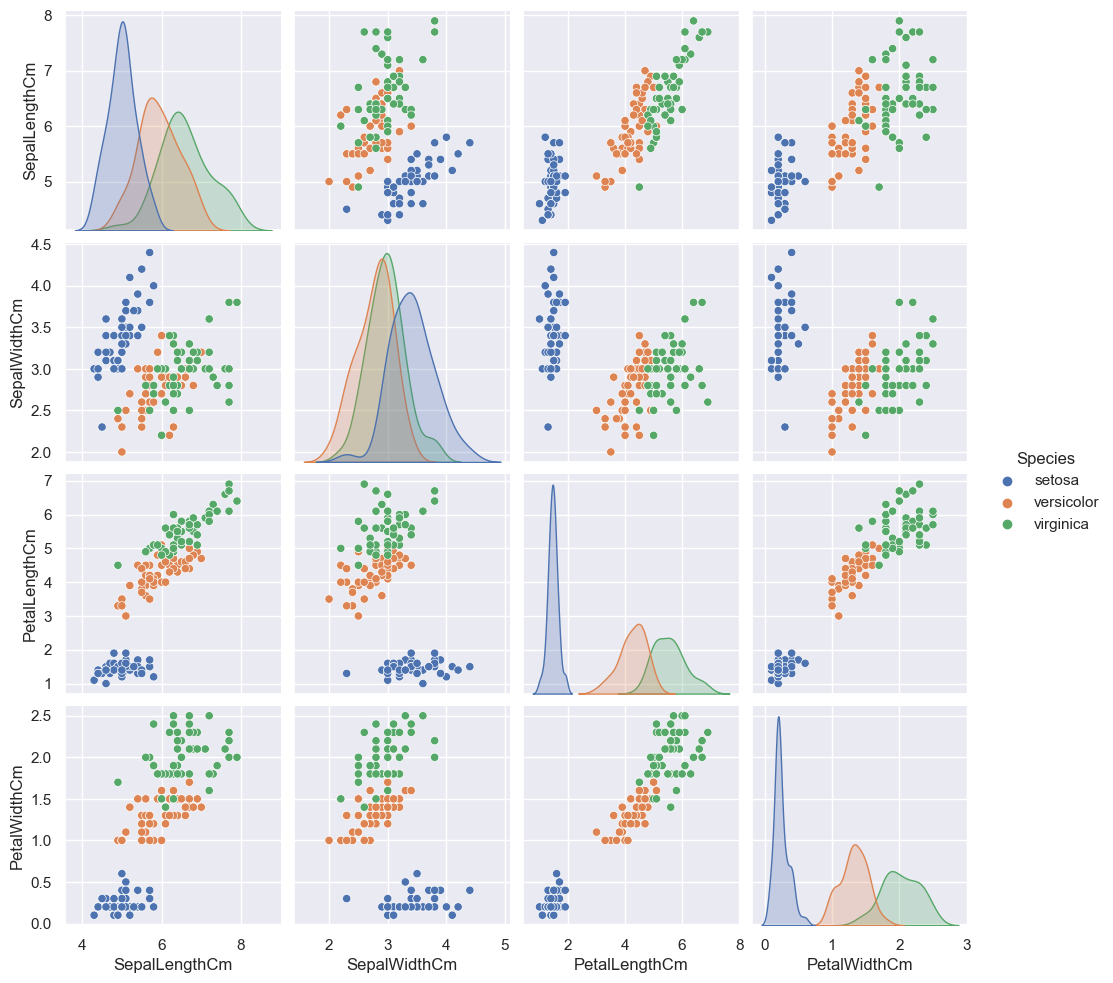

In [47]:
#correlation between each measurement
sns.set_context('notebook')
sns.set_palette('deep')
sns.pairplot(df,hue='Species')


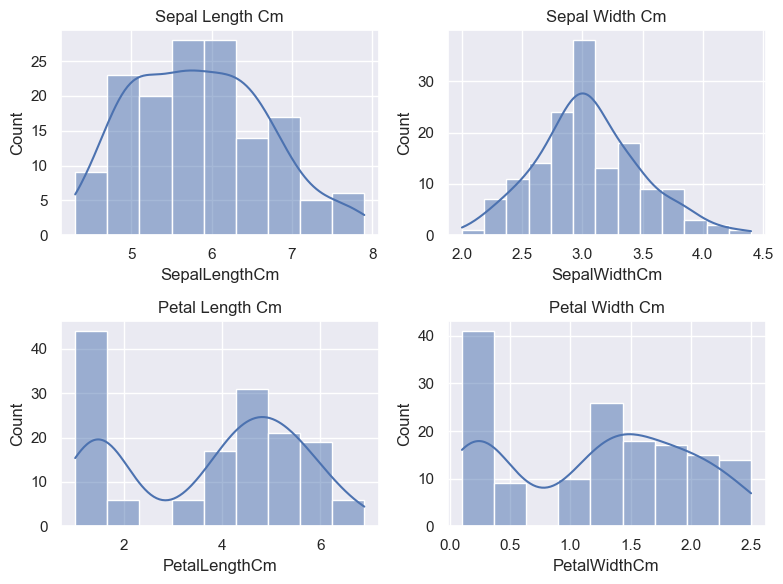

In [53]:
#distribution of features using subplot,seaborn
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(data=df,x="SepalLengthCm",kde=True)
plt.title('Sepal Length Cm')
plt.subplot(2,2,2)
sns.histplot(data=df,x='SepalWidthCm',kde=True)
plt.title('Sepal Width Cm')
plt.subplot(2,2,3)
sns.histplot(data=df,x='PetalLengthCm',kde=True)
plt.title('Petal Length Cm')
plt.subplot(2,2,4)
sns.histplot(data=df,x='PetalWidthCm',kde=True)
plt.title('Petal Width Cm')
plt.tight_layout()
plt.show()


# Train Test split


In [72]:
input_data=df.drop(['Species'],axis=1)
target_data=df['Species']

In [73]:
#split data to train and test sets
x_train,x_value,y_train,y_value=train_test_split(input_data,target_data,test_size=0.2,random_state=365)

In [74]:
#labeling target 
label_enc=LabelEncoder()
y_train_enc=label_enc.fit_transform(y_train)
y_val_enc=label_enc.transform(y_value)
target_name=['setosa','versicolor','virginica']

In [81]:
x_train
y_train_enc

array([2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0,
       2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

# hyper-parameter with ML algorithms 

In [93]:
#defining models used
mod={
    'Logistic Regression':(LogisticRegression(),{'C':[0.1,1,10],'penalty':['l1','l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'Decision Tree':(DecisionTreeClassifier(),{'criterion':['gini','entropy'],'max_depth':[None,5,10,15]}),
    'KNN':(KNeighborsClassifier(),{'n_neighbors':[3,5,7],'weights':['uniform','distance']}),
    'Naive Bayers':(GaussianNB(),{}),
    'XGBoost':(xgb.XGBClassifier(),{'learning_rate':[0.1,0.01,0.001],'max_depth':[3,5,7]}),
    'Neural Network':(MLPClassifier(),{'hidden_layer_sizes':[(100,),(50,50),(20,20,20)],'activation':['relu','tanh']}),
    'SVM':(SVC(),{'C':range(1,151),'kernel':['poly'],'gamma':['scale','auto']})}


train and eval Logistic Regression
--Logistic Regression
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


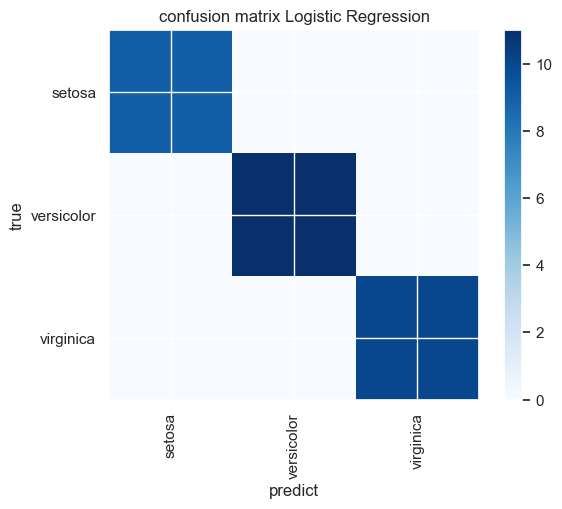

best model : LogisticRegression(C=10)
train and eval Random Forest
--Random Forest
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


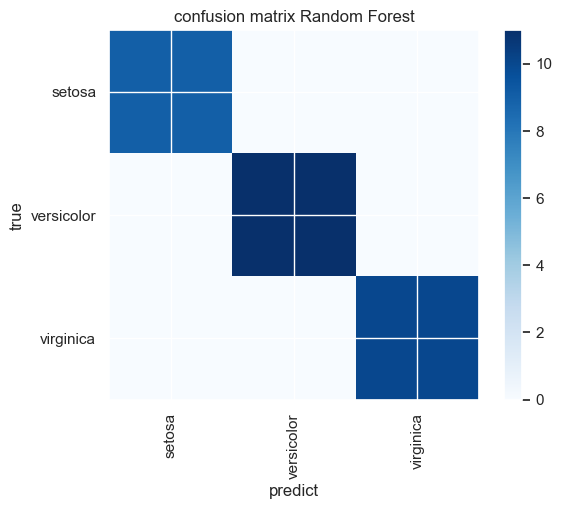

best model : RandomForestClassifier()
train and eval Decision Tree
--Decision Tree
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


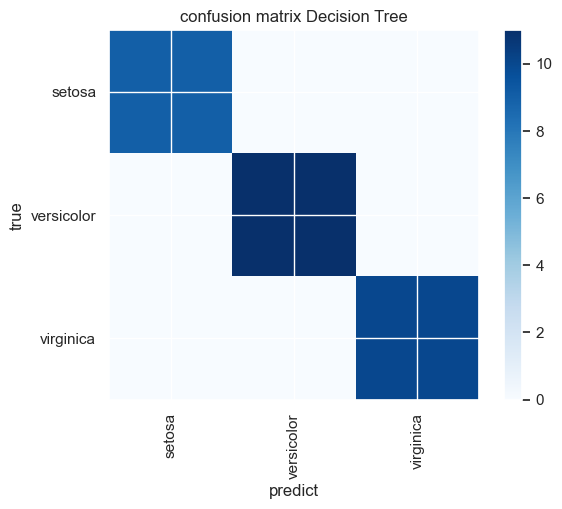

best model : DecisionTreeClassifier(criterion='entropy')
train and eval KNN
--KNN
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


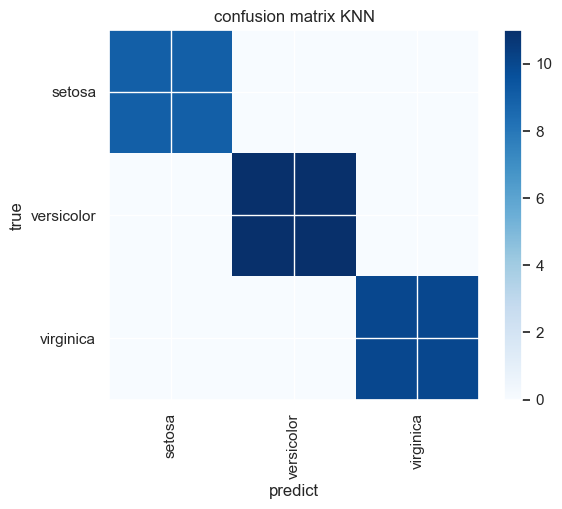

best model : KNeighborsClassifier(n_neighbors=7, weights='distance')
train and eval Naive Bayers
--Naive Bayers
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


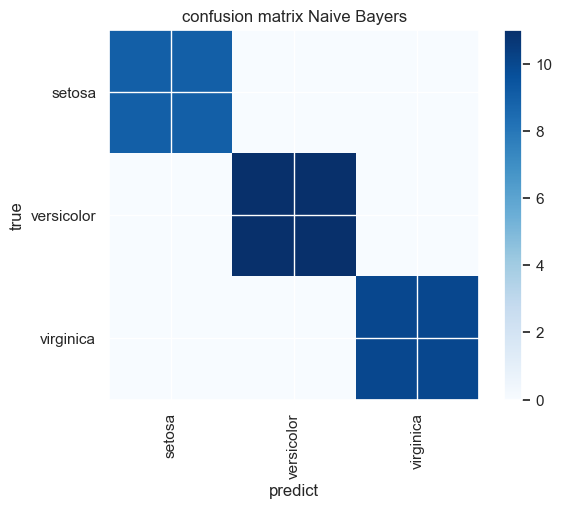

best model : GaussianNB()
train and eval XGBoost
--XGBoost
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


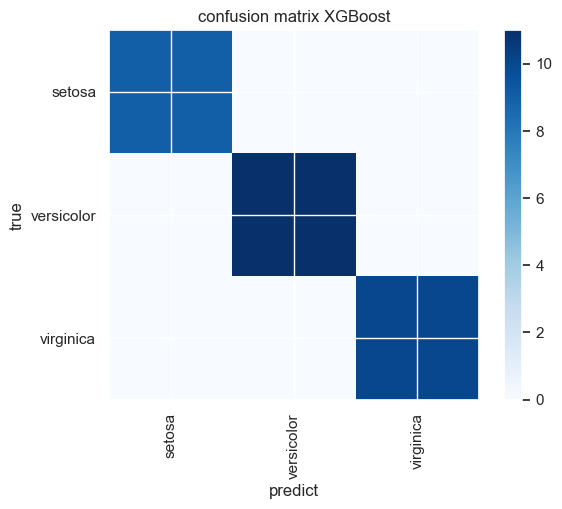

best model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
train and eval Neural Network
--Neural Network
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica

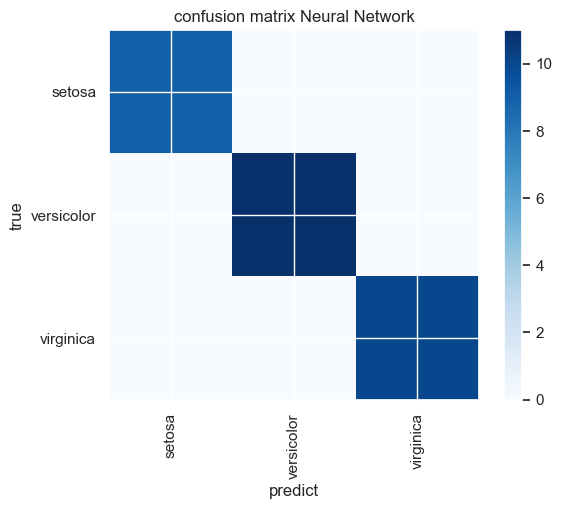

best model : MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50))
train and eval SVM
--SVM
testing
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix


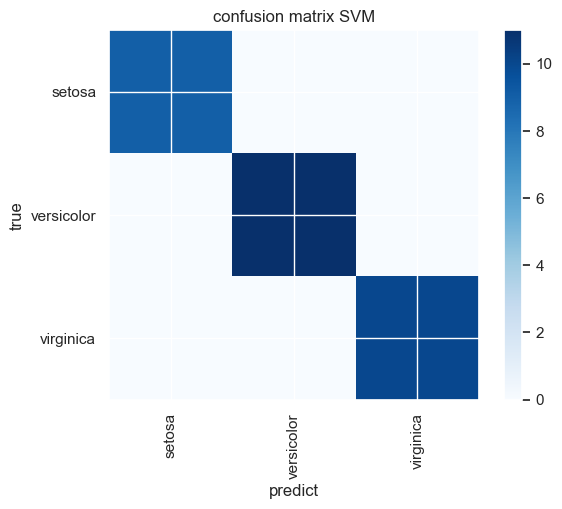

best model : SVC(C=1, kernel='poly')


In [94]:
for model_name,(model,param_grid) in mod.items():
    print(f"train and eval {model_name}")
    #Grid Search CV
    grid_s=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
    grid_s.fit(x_train,y_train_enc)
    b_model=grid_s.best_estimator_
    
    # Evaluation on testing data
    y_value_predict=b_model.predict(x_value,)
    test_class_rep=classification_report(y_val_enc,y_value_predict,target_names=target_name)
    test_cof_matrix=confusion_matrix(y_val_enc,y_value_predict)
    
    print(f"--{model_name}")
    print("testing")
    print(test_class_rep)
    print("Confusion Matrix")
    #ploting confusion matrix
    plt.figure()
    plt.imshow(test_cof_matrix,cmap='Blues')
    plt.title(f'confusion matrix {model_name}')
    plt.colorbar()
    plt.xticks(np.arange(len(target_name)),target_name,rotation=90)
    plt.yticks(np.arange(len(target_name)),target_name)
    plt.xlabel('predict')
    plt.ylabel('true')
    plt.show()
    print(f"best model : {b_model}")
    